# Load Libs

In [1]:
### Load Python Lib##### 
########
import numpy as np
from math import *
import matplotlib.pyplot as plt
from random import gauss, randint
from matplotlib import rc
from matplotlib.ticker import FixedLocator, MultipleLocator, FormatStrFormatter

#very import to enable this so the plots can be showed in the page
get_ipython().magic(u'matplotlib inline')

# Use LaTeX font.
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman'],'size':20})

import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=12)

# Load MC Data

In [273]:
###########
Q2Bin=0
###########

####### Deutron ###########
#filename1 = 'new_histo/d2_output_Q2_%d_lo_wide_noPt.dat'%Q2Bin
filename1 = 'new_histo/d2_output_Q2_%d_lo_tight_noPt.dat'%Q2Bin
#filename1 = 'new_histo/d2_output_Q2_%d_lo_wide_free_noPT.dat'%Q2Bin
#filename1 = 'new_histo/d2_output_Q2_%d_lo_tight_free_noPT.dat'%Q2Bin
A1=2.

####### C12 ###########
#filename2 = 'new_histo/c12_output_Q2_%d_lo_wide_noPt.dat'%Q2Bin
#filename2 = 'new_histo/c12_output_Q2_%d_lo_tight_noPt.dat'%Q2Bin
#filename2 = 'new_histo/c12_output_Q2_%d_lo_wide_free_noPT.dat'%Q2Bin
#filename2 = 'new_histo/c12_output_Q2_%d_lo_tight_free_noPT.dat'%Q2Bin
#A2 = 12.

#filename2 = 'new_histo/d2_output_Q2_%d_lo_wide_noPt.dat'%Q2Bin
#filename2 = 'new_histo/d2_output_Q2_%d_lo_tight_noPt.dat'%Q2Bin
#filename2 = 'new_histo/d2_output_Q2_%d_lo_wide_free_noPT.dat'%Q2Bin
filename2 = 'new_histo/d2_output_Q2_%d_lo_tight_free_noPT.dat'%Q2Bin
A2=2.

## e-D Data

In [274]:
### Loading the theoretical calculations
lines1 = open(filename1,'r').readlines()

N = len(lines1)-1
W = np.zeros(N, dtype=float)
Q2 = np.zeros(N, dtype=float)
x = np.zeros(N, dtype=float)
z = np.zeros(N, dtype=float)
pt = np.zeros(N, dtype=float)
asy = np.zeros(N, dtype=float)     
xs_inc = np.zeros(N, dtype=float)  
xs_pip = np.zeros(N, dtype=float)  
xs_pim = np.zeros(N, dtype=float) 
N_inc = np.zeros(N, dtype=float)   
N_pip = np.zeros(N, dtype=float)   
N_pim = np.zeros(N, dtype=float)   
mulp_pip = np.zeros(N, dtype=float)   
mulp_pim = np.zeros(N, dtype=float)   
mulp_err_pip = np.zeros(N, dtype=float)  
mulp_err_pim = np.zeros(N, dtype=float)   
Asym = np.zeros(N, dtype=float)   
Astat = np.zeros(N, dtype=float)   
Ax = np.zeros(N, dtype=float)   

u_pdf = np.zeros(N, dtype=float)  
d_pdf = np.zeros(N, dtype=float)  
ubar_pdf = np.zeros(N, dtype=float)  
dbar_pdf = np.zeros(N, dtype=float)  
g_pdf = np.zeros(N, dtype=float)  
s_pdf = np.zeros(N, dtype=float)  
sbar_pdf = np.zeros(N, dtype=float)  

u_avg = np.zeros(N, dtype=float)  
d_avg = np.zeros(N, dtype=float)  
ubar_avg = np.zeros(N, dtype=float)  
dbar_avg = np.zeros(N, dtype=float)  
g_avg = np.zeros(N, dtype=float)  
s_avg = np.zeros(N, dtype=float)  
sbar_avg = np.zeros(N, dtype=float)  

u_m = np.zeros(N, dtype=float)  
d_m = np.zeros(N, dtype=float)  
ubar_m = np.zeros(N, dtype=float)  
dbar_m = np.zeros(N, dtype=float)  
g_m = np.zeros(N, dtype=float)  
s_m = np.zeros(N, dtype=float)  
sbar_m = np.zeros(N, dtype=float)  

N_MC = np.zeros(N, dtype=float)   

Q2_avg = 0.0

## Read-In 
for i in range(0, N):
    values=lines1[i+1].split()
    values = np.array(values,dtype=float)
    Q2[i]=(values[1])
    x[i]=(values[2])
    W[i]=(values[3])
    z[i]=(values[4])
    pt[i]=(values[5])
    xs_inc[i]=(values[6])
    xs_pip[i]=(values[7])
    xs_pim[i]=(values[8])
#    xs_inc[i]=pow(10,values[6])
#    xs_pip[i]=pow(10,values[7])
#    xs_pim[i]=pow(10,values[8])
    N_inc[i]=(values[9])
    N_pip[i]=(values[10])
    N_pim[i]=(values[11])
    mulp_pip[i]=(values[12])
    mulp_pim[i]=(values[13])
    Asym[i]=(values[14])
    #Asym[i] = (mulp_pip[i]-mulp_pim[i]) #/(mulp_pip[i]+mulp_pim[i])
#    Astat[i]=(values[15])
    Astat[i]=1.0/sqrt(values[31])

    Ax[i]=(values[16])

#    u_avg[i]=0.5*(values[17]+values[18])
#    d_avg[i]=0.5*(values[17]+values[18])
    u_avg[i]=(values[17])
    ubar_avg[i]=(values[18])
    d_avg[i]=(values[19])
    dbar_avg[i]=(values[20])
    s_avg[i]=(values[21])
    sbar_avg[i]=(values[22])
    g_avg[i]=(values[23])

    u_pdf[i]=(values[24])
    ubar_pdf[i]=(values[25])
    d_pdf[i]=(values[26])
    dbar_pdf[i]=(values[27])
    s_pdf[i]=(values[28])
    sbar_pdf[i]=(values[29])
    g_pdf[i]=(values[30])

    u_m[i]=(values[31])
    ubar_m[i]=(values[32])
    d_m[i]=(values[33])
    dbar_m[i]=(values[34])
    s_m[i]=(values[35])
    sbar_m[i]=(values[36])
    g_m[i]=(values[37])
    N_MC[i]=(values[38])
    
    Q2_avg += Q2[i]
Q2_avg /= (N-1)

## e-C12 Data

In [275]:
### Loading the theoretical calculations
#filename2 = 'bin_results/c12_output_Q2_%d_new.dat'%Q2Bin
lines2 = open(filename2,'r').readlines()

N = len(lines2)-1
W_c12 = np.zeros(N, dtype=float)
Q2_c12 = np.zeros(N, dtype=float)
x_c12 = np.zeros(N, dtype=float)
z_c12 = np.zeros(N, dtype=float)
pt_c12 = np.zeros(N, dtype=float)
asy_c12 = np.zeros(N, dtype=float)     
xs_inc_c12 = np.zeros(N, dtype=float)  
xs_pip_c12 = np.zeros(N, dtype=float)  
xs_pim_c12 = np.zeros(N, dtype=float) 
N_inc_c12 = np.zeros(N, dtype=float)   
N_pip_c12 = np.zeros(N, dtype=float)   
N_pim_c12 = np.zeros(N, dtype=float)   
mulp_pip_c12 = np.zeros(N, dtype=float)   
mulp_pim_c12 = np.zeros(N, dtype=float)   
Asym_c12 = np.zeros(N, dtype=float)   
Astat_c12 = np.zeros(N, dtype=float)   
Ax_c12 = np.zeros(N, dtype=float)   
mulp_err_pip_c12 = np.zeros(N, dtype=float)  
mulp_err_pim_c12 = np.zeros(N, dtype=float)

u_avg_c12 = np.zeros(N, dtype=float)  
d_avg_c12 = np.zeros(N, dtype=float)  
ubar_avg_c12 = np.zeros(N, dtype=float)  
dbar_avg_c12 = np.zeros(N, dtype=float)  
g_avg_c12 = np.zeros(N, dtype=float)  
s_avg_c12 = np.zeros(N, dtype=float)  
sbar_avg_c12 = np.zeros(N, dtype=float)  

u_pdf_c12 = np.zeros(N, dtype=float)  
d_pdf_c12 = np.zeros(N, dtype=float)  
ubar_pdf_c12 = np.zeros(N, dtype=float)  
dbar_pdf_c12 = np.zeros(N, dtype=float)  
g_pdf_c12 = np.zeros(N, dtype=float)  
s_pdf_c12 = np.zeros(N, dtype=float)  
sbar_pdf_c12 = np.zeros(N, dtype=float)  
N_MC_c12 = np.zeros(N, dtype=float)   

u_m_c12 = np.zeros(N, dtype=float)  
d_m_c12 = np.zeros(N, dtype=float)  
ubar_m_c12 = np.zeros(N, dtype=float)  
dbar_m_c12 = np.zeros(N, dtype=float)  
g_m_c12 = np.zeros(N, dtype=float)  
s_m_c12 = np.zeros(N, dtype=float)  
sbar_m_c12 = np.zeros(N, dtype=float)  

Q2_avg_c12 = 0.0

## Read-In 
for i in range(0, N):
    values=lines2[i+1].split()
    values = np.array(values,dtype=float)
    Q2_c12[i]=(values[1])
    x_c12[i]=(values[2])
    W_c12[i]=(values[3])
    z_c12[i]=(values[4])
    pt_c12[i]=(values[5])
    xs_inc_c12[i]=(values[6])
    xs_pip_c12[i]=(values[7])
    xs_pim_c12[i]=(values[8])
#    xs_inc_c12[i]=pow(10,values[6])
#    xs_pip_c12[i]=pow(10,values[7])
#    xs_pim_c12[i]=pow(10,values[8])
    N_inc_c12[i]=(values[9])
    N_pip_c12[i]=(values[10])
    N_pim_c12[i]=(values[11])
    mulp_pip_c12[i]=(values[12])
    mulp_pim_c12[i]=(values[13])
    Asym_c12[i]=(values[14])
    #Asym[i] = (mulp_pip[i]-mulp_pim[i]) #/(mulp_pip[i]+mulp_pim[i])
    Astat_c12[i]=1.0/sqrt(values[31])
    #Astat_c12[i]=(values[15])
    
    Ax_c12[i]=(values[16])

    u_avg_c12[i]=(values[17])
    ubar_avg_c12[i]=(values[18])
    d_avg_c12[i]=(values[19])
    dbar_avg_c12[i]=(values[20])
    s_avg_c12[i]=(values[21])
    sbar_avg_c12[i]=(values[22])
    g_avg_c12[i]=(values[23])   
    
    u_pdf_c12[i]=(values[24])
    ubar_pdf_c12[i]=(values[25])
    d_pdf_c12[i]=(values[26])
    dbar_pdf_c12[i]=(values[27])
    s_pdf_c12[i]=(values[28])
    sbar_pdf_c12[i]=(values[29])
    g_pdf_c12[i]=(values[30])   
    
    u_m_c12[i]=(values[31])
    ubar_m_c12[i]=(values[32])
    d_m_c12[i]=(values[33])
    dbar_m_c12[i]=(values[34])
    s_m_c12[i]=(values[35])
    sbar_m_c12[i]=(values[36])
    g_m_c12[i]=(values[37])
    
    N_MC_c12[i]=(values[38])   
    Q2_avg_c12 += Q2_c12[i]
    
Q2_avg_c12 /= (N-1)

# Calculating Asymmetry

In [276]:
##Calculate Asym

AXS_c12_d2 = np.zeros(N, dtype=float)
AXSerr_c12_d2 = np.zeros(N, dtype=float)
AN_c12_d2 = np.zeros(N, dtype=float)
ANerr_c12_d2 = np.zeros(N, dtype=float)
APDF_c12_d2 = np.zeros(N, dtype=float)
APDF_c12_d2_avg = np.zeros(N, dtype=float)
APDF_c12_d2_m = np.zeros(N, dtype=float)
err_c12_d2 = np.zeros(N, dtype=float)

for i in range (0,N):
    #err_c12_d2[i] =  sqrt( 1./N_pip_c12[i] + 1./N_pim_c12[i] + 1./N_pip[i] + 1./N_pim[i]) 
    err_c12_d2[i] =  sqrt( 1./N_MC_c12[i] + 1./N_MC[i]) 

    AXS_c12_d2[i] = A1/A2*(xs_pip_c12[i] - xs_pim_c12[i]) / (xs_pip[i] - xs_pim[i])
    #AXS_c12_d2[i] = ((xs_pip_c12[i] - xs_pim_c12[i])/(xs_pip_c12[i] + xs_pim_c12[i])) / ((xs_pip[i] - xs_pim[i])/(xs_pip[i] + xs_pim[i]))
    AXSerr_c12_d2[i] = AXS_c12_d2[i] * err_c12_d2[i]
        
    AN_c12_d2[i] = A1/A2 * (N_pip_c12[i] - N_pim_c12[i]) / (N_pip[i] - N_pim[i])
    ANerr_c12_d2[i] = AN_c12_d2[i] * err_c12_d2[i]
    
#    APDF_c12_d2[i]     =( (u_pdf_c12[i] - ubar_pdf_c12[i]) - (d_pdf_c12[i] - dbar_pdf_c12[i]) ) / ( (u_pdf[i]-ubar_pdf[i]) - (d_pdf[i]-dbar_pdf[i]))
    APDF_c12_d2[i]     =( (u_pdf_c12[i] - ubar_pdf_c12[i]) - (d_pdf_c12[i] - dbar_pdf_c12[i]) ) / ( (u_pdf[i]-ubar_pdf[i]) - (d_pdf[i]-dbar_pdf[i]))
    APDF_c12_d2_avg[i] =( (u_avg_c12[i] - ubar_avg_c12[i]) - (d_avg_c12[i] - dbar_avg_c12[i]) ) / ( (u_avg[i]-ubar_avg[i]) - (d_avg[i]-dbar_avg[i]))
    APDF_c12_d2_m[i] =( (u_m_c12[i] - ubar_m_c12[i]) - (d_m_c12[i] - dbar_m_c12[i]) ) / ( (u_m[i]-ubar_m[i]) - (d_m[i]-dbar_m[i]))

# Plotting

## Asym

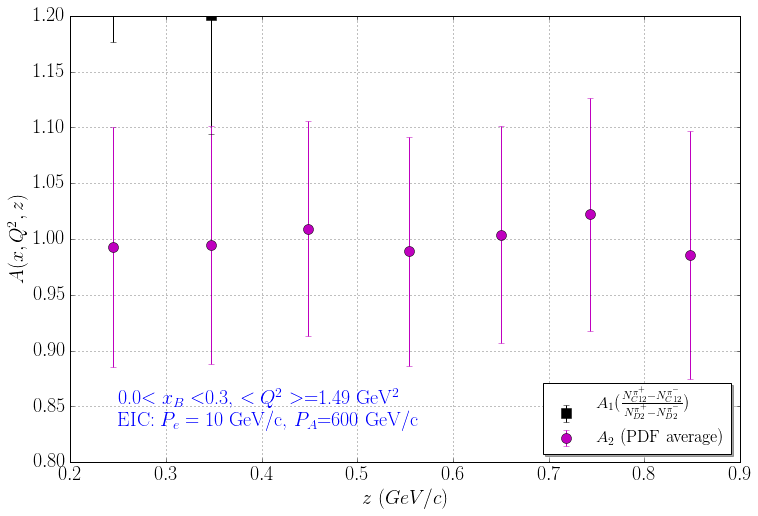

In [277]:
##Asym

ymin=0.8
ymax=1.2

f1, axis = plt.subplots(1, 1, sharex=False, figsize=(12,8))

#axis.errorbar(z, AXS_c12_d2, yerr=err_c12_d2 ,fmt='v', markersize='10',color='red',  label=r'Average XS')
axis.errorbar(z, AN_c12_d2, yerr=err_c12_d2 ,fmt='s',markersize='10', color='black',  label=r'$A_1(\frac{N_{C12}^{\pi^+} - N_{C12}^{\pi^-}}{N_{D2}^{\pi^+}-N_{D2}^{\pi^-}})$')

#axis.errorbar(z, APDF_c12_d2, yerr=err_c12_d2 ,fmt='o',markersize='10', color='blue',  label=r'$A_2$ (PDF bin-center)')
axis.errorbar(z, APDF_c12_d2_avg, yerr=err_c12_d2 ,fmt='o',markersize='10', color='m',  label=r'$A_2$ (PDF average)')
#axis.errorbar(z, APDF_c12_d2_m, yerr=err_c12_d2 ,fmt='o',markersize='10', color='g',  label=r'$A_2$ (PDF mean)')

axis.set_ylabel(r'$A(x, Q^2, z)$')
axis.set_xlabel(r'$z~(GeV/c)$')
axis.set_ylim(ymin,ymax)
axis.grid()

font_prop = font_manager.FontProperties(size=20)
#axis.text(0.25, 0.85, r'0.08$<x_{B}<$0.12, $<Q^2>$=%4.2f GeV$^2$'%Q2_avg, color = 'b', fontproperties=font_prop)
axis.text(0.25, 0.85, r'0.0$<x_{B}<$0.3, $<Q^2>$=%4.2f GeV$^2$'%Q2_avg, color = 'b', fontproperties=font_prop)
axis.text(0.25, 0.83, r'EIC: $P_e = 10$ GeV/c, $P_{A}$=600 GeV/c', color = 'b', fontproperties=font_prop)


font_prop1 = font_manager.FontProperties(size=24)
#axis.text(0.24, 0.96, r'$A_1 =\frac{ [N^{\pi^{+}}_{C12}(x, Q^2,z) - N^{\pi^{-}}_{C12}(x, Q^2,z)]/[N^{\pi^{+}}_{C12}(x, Q^2,z) + N^{\pi^{-}}_{C12}(x, Q^2,z)]  }{ [N^{\pi^{+}}_{D2}(x, Q^2,z) - N^{\pi^{-}}_{D2}(x, Q^2,z)]/[N^{\pi^{+}}_{D2}(x, Q^2,z) + N^{\pi^{-}}_{D2}(x, Q^2,z)]  }$',fontproperties=font_prop1)
#axis.text(0.24, 0.96, r'$A_1 =\frac{12}{2}\frac{ N^{\pi^{+}}_{C12}(x, Q^2,z) - N^{\pi^{-}}_{C12}(x, Q^2,z)}{ N^{\pi^{+}}_{D2}(x, Q^2,z) - N^{\pi^{-}}_{D2}(x, Q^2,z) }$',fontproperties=font_prop1)
#axis.text(0.24, 0.94, r'$A_2 =\frac{12}{2}\frac{[u^{C12}(x,Q^2)-\bar{u}^{C12}(x,Q^2)]-[d^{C12}(x,Q^2)-\bar{d}^{C12}(x,Q^2)]}{[u^{D2}(x,Q^2)-\bar{u}^{D2}(x,Q^2)]-[d^{D2}(x,Q^2)-\bar{d}^{D2}(x,Q^2)]}$',fontproperties=font_prop1)


axis.legend(loc='lower right', shadow='True', fontsize='small', numpoints=1,)

plotname='asym_d2_d2_Q2_%d_lo_tight_free.png'%Q2Bin
plt.savefig(plotname,bbox_inches='tight')

## Checking Medium Modification Effect

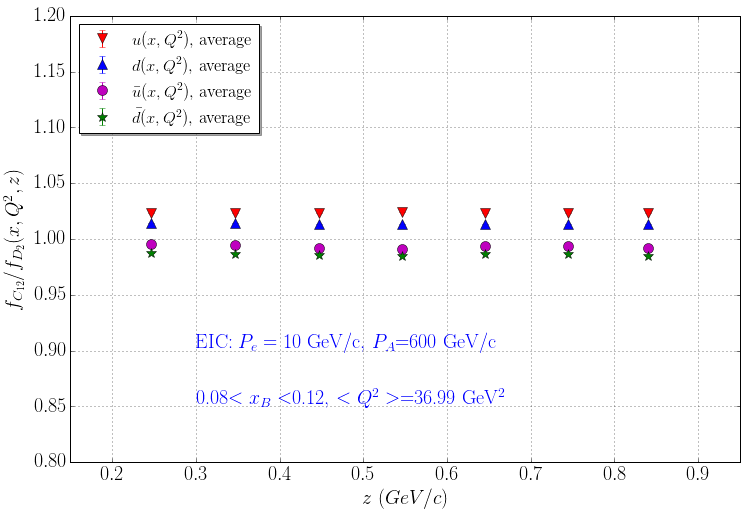

In [161]:
##PDF Check1

ymin=0.8
ymax=1.2

f1, axis = plt.subplots(1, 1, sharex=False, figsize=(12,8))

axis.errorbar(z, u_avg_c12/(u_avg), yerr=0,fmt='v',markersize='10', color='red',  label=r'$u(x,Q^2)$, average')
axis.errorbar(z, d_avg_c12/(d_avg), yerr=0,fmt='^',markersize='10', color='blue',  label=r'$d(x,Q^2)$, average')
axis.errorbar(z, ubar_avg_c12/ubar_avg, yerr=0,fmt='o',markersize='10', color='m',  label=r'$\bar{u}(x,Q^2)$, average')
axis.errorbar(z, dbar_avg_c12/dbar_avg, yerr=0,fmt='*',markersize='10', color='g',  label=r'$\bar{d}(x,Q^2)$, average')

axis.set_ylabel(r'$f_{C_{12}}/f_{D_2}(x, Q^2, z)$')
axis.set_xlabel(r'$z~(GeV/c)$')
axis.set_xlim(0.15,0.95)
axis.set_ylim(ymin,ymax)
axis.grid()
axis.legend(loc='upper left', shadow='True', fontsize='small', numpoints=1,)


font_prop = font_manager.FontProperties(size=20)
#axis.text(0.35, 0.88, r'0.08$<x_{B}<$0.12, $<Q^2>$=%4.2f ~GeV$^2$'%Q2_avg, color = 'b', fontproperties=font_prop)
#axis.text(0.35, 0.86, r'EIC: $P_e = 10$ GeV/c, $P_{A}$=600 GeV/c', color = 'b', fontproperties=font_prop)

font_prop = font_manager.FontProperties(size=20)
axis.text(0.30, ymin+0.05, r'0.08$<x_{B}<$0.12, $<Q^2>$=%4.2f GeV$^2$'%Q2_avg, color = 'b', fontproperties=font_prop)
axis.text(0.3, ymin+0.10, r'EIC: $P_e = 10$ GeV/c, $P_{A}$=600 GeV/c', color = 'b', fontproperties=font_prop)


#plotname='pdf_c12_c12_Q2_%d_lo.pdf'%Q2Bin
#plt.savefig(plotname,bbox_inches='tight')
#plotname='pdf_c12_d2_Q2_%d_lo.png'%Q2Bin
#plt.savefig(plotname,bbox_inches='tight')

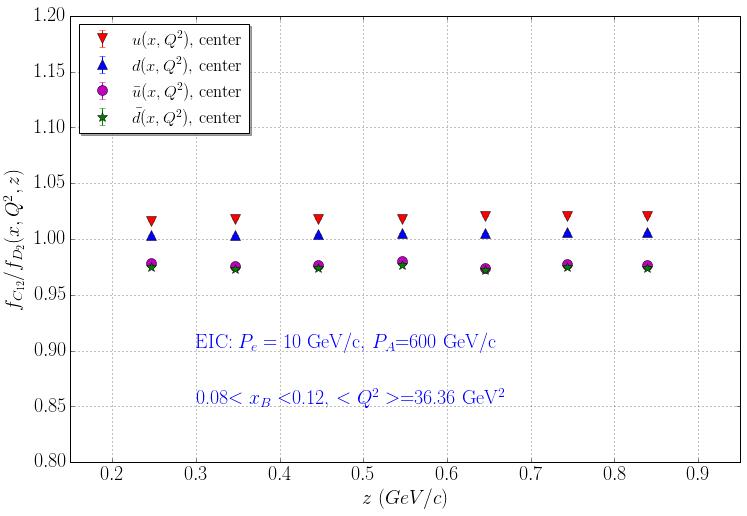

In [154]:
##PDF Check1

ymin=0.8
ymax=1.2

f1, axis = plt.subplots(1, 1, sharex=False, figsize=(12,8))

axis.errorbar(z, u_pdf_c12/(u_pdf), yerr=0,fmt='v',markersize='10', color='red',  label=r'$u(x,Q^2)$, center')
axis.errorbar(z, d_pdf_c12/(d_pdf), yerr=0,fmt='^',markersize='10', color='blue',  label=r'$d(x,Q^2)$, center')
axis.errorbar(z, ubar_pdf_c12/ubar_pdf, yerr=0,fmt='o',markersize='10', color='m',  label=r'$\bar{u}(x,Q^2)$, center')
axis.errorbar(z, dbar_pdf_c12/dbar_pdf, yerr=0,fmt='*',markersize='10', color='g',  label=r'$\bar{d}(x,Q^2)$, center')

axis.set_ylabel(r'$f_{C_{12}}/f_{D_2}(x, Q^2, z)$')
axis.set_xlabel(r'$z~(GeV/c)$')
axis.set_xlim(0.15,0.95)
axis.set_ylim(ymin,ymax)
axis.grid()
axis.legend(loc='upper left', shadow='True', fontsize='small', numpoints=1,)


font_prop = font_manager.FontProperties(size=20)
#axis.text(0.35, 0.88, r'0.08$<x_{B}<$0.12, $<Q^2>$=%4.2f ~GeV$^2$'%Q2_avg, color = 'b', fontproperties=font_prop)
#axis.text(0.35, 0.86, r'EIC: $P_e = 10$ GeV/c, $P_{A}$=600 GeV/c', color = 'b', fontproperties=font_prop)

font_prop = font_manager.FontProperties(size=20)
axis.text(0.30, ymin+0.05, r'0.08$<x_{B}<$0.12, $<Q^2>$=%4.2f GeV$^2$'%Q2_avg, color = 'b', fontproperties=font_prop)
axis.text(0.3, ymin+0.10, r'EIC: $P_e = 10$ GeV/c, $P_{A}$=600 GeV/c', color = 'b', fontproperties=font_prop)


#plotname='pdf_c12_c12_Q2_%d_lo.pdf'%Q2Bin
#plt.savefig(plotname,bbox_inches='tight')
#plotname='pdf_c12_d2_Q2_%d_lo.png'%Q2Bin
#plt.savefig(plotname,bbox_inches='tight')

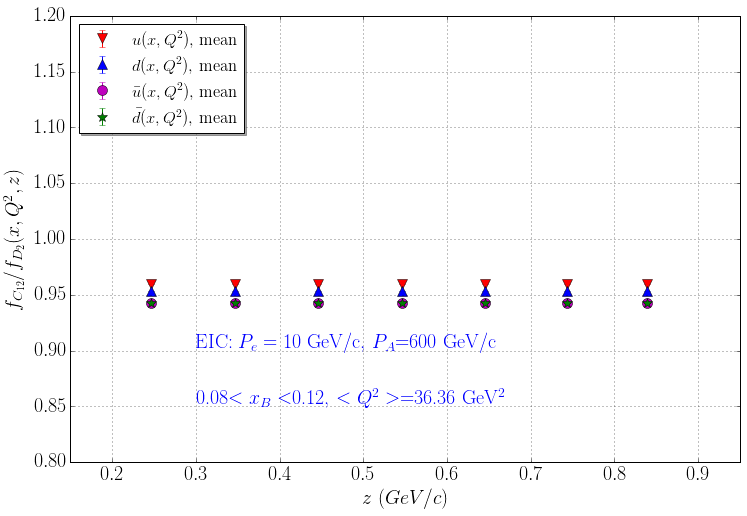

In [155]:
## PDF Check1

ymin=0.8
ymax=1.2

f1, axis = plt.subplots(1, 1, sharex=False, figsize=(12,8))

axis.errorbar(z, u_m_c12/(u_m), yerr=0,fmt='v',markersize='10', color='red',  label=r'$u(x,Q^2)$, mean')
axis.errorbar(z, d_m_c12/(d_m), yerr=0,fmt='^',markersize='10', color='blue',  label=r'$d(x,Q^2)$, mean')
axis.errorbar(z, ubar_m_c12/ubar_m, yerr=0,fmt='o',markersize='10', color='m',  label=r'$\bar{u}(x,Q^2)$, mean')
axis.errorbar(z, dbar_m_c12/dbar_m, yerr=0,fmt='*',markersize='10', color='g',  label=r'$\bar{d}(x,Q^2)$, mean')

axis.set_ylabel(r'$f_{C_{12}}/f_{D_2}(x, Q^2, z)$')
axis.set_xlabel(r'$z~(GeV/c)$')
axis.set_xlim(0.15,0.95)
axis.set_ylim(ymin,ymax)
axis.grid()
axis.legend(loc='upper left', shadow='True', fontsize='small', numpoints=1,)


font_prop = font_manager.FontProperties(size=20)
#axis.text(0.35, 0.88, r'0.08$<x_{B}<$0.12, $<Q^2>$=%4.2f ~GeV$^2$'%Q2_avg, color = 'b', fontproperties=font_prop)
#axis.text(0.35, 0.86, r'EIC: $P_e = 10$ GeV/c, $P_{A}$=600 GeV/c', color = 'b', fontproperties=font_prop)

font_prop = font_manager.FontProperties(size=20)
axis.text(0.30, ymin+0.05, r'0.08$<x_{B}<$0.12, $<Q^2>$=%4.2f GeV$^2$'%Q2_avg, color = 'b', fontproperties=font_prop)
axis.text(0.3, ymin+0.10, r'EIC: $P_e = 10$ GeV/c, $P_{A}$=600 GeV/c', color = 'b', fontproperties=font_prop)


#plotname='pdf_c12_c12_Q2_%d_lo.pdf'%Q2Bin
#plt.savefig(plotname,bbox_inches='tight')
#plotname='pdf_c12_d2_Q2_%d_lo.png'%Q2Bin
#plt.savefig(plotname,bbox_inches='tight')